### 이미지 수집
이미지를 직접 수집해서 데이터셋을 빌드한다.

### cv2.stylization
영화 장면의 이미지를 수집해서 스케치한 효과가 날 수 있게 opencv를 활용한다.

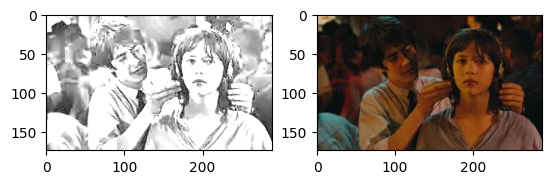

In [36]:
import os
import cv2
import time
import shutil
import requests
import matplotlib.pyplot as plt
from selenium import webdriver
from urllib.parse import quote
from urllib.request import urlretrieve
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

def pencil_sketch(img):
    img = cv2.fastNlMeansDenoisingColored(img)  # 디노이징
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # BGR -> GRAY
    blr = cv2.GaussianBlur(gray, (0, 0), 23)  # 가우시안 필터
    dst = cv2.divide(gray, blr, scale=255)
    return dst

img = cv2.imread("./1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_img = pencil_sketch(img)
new_img = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.subplot(1, 2, 1)
plt.imshow(new_img)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.show()

### Image URL 수집
selenium으로 url을수집한다.

In [7]:
# driver 옵션 정의
options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
options.add_argument('--disable-gpu')
# options.add_argument("headless")
options.add_experimental_option('excludeSwitches', ['enable-logging'])
options.add_experimental_option('excludeSwitches', ['enable-automation'])
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                      AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36")

In [8]:
# 스크롤 다운 함수 정의
def scroll_down(body):
    for _ in range(1, 4):
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)

In [28]:
driver = webdriver.Chrome(options = options)
url = "https://www.google.com/search?q=movie+scene&sca_esv=298519f35b8410b7&rlz=1C1IBEF_koKR1030KR1030&udm=2&biw=1920&bih=919&ei=yiwXZsfUNOG0vr0PoISM6AU&ved=0ahUKEwjH4en58biFAxVhmq8BHSACA10Q4dUDCBA&uact=5&oq=movie+scene&gs_lp=Egxnd3Mtd2l6LXNlcnAiC21vdmllIHNjZW5lMgUQABiABDIFEAAYgAQyBBAAGB4yBBAAGB4yBBAAGB4yBBAAGB4yBBAAGB4yBBAAGB4yBBAAGB4yBBAAGB5Iqh1Q9AlY0xZwA3gAkAEAmAFvoAGVBqoBAzUuM7gBA8gBAPgBAZgCC6ACwAbCAgYQABgHGB6YAwCIBgGSBwM3LjSgB88m&sclient=gws-wiz-serp"
driver.get(url)
main = driver.find_element(By.CLASS_NAME, "srp")
time.sleep(2)

for _ in range(10):
    scroll_down(main)
    
body = driver.find_element(By.CLASS_NAME, "wIjY0d.jFk0f")
imgs = body.find_elements(By.TAG_NAME, "img")
src_list = []
for img in imgs:
    src = img.get_attribute("src")
    if src.startswith("https:"):
        src_list.append(src)
driver.close()

In [29]:
src_list_copy = [i for i in src_list if i != None]

In [30]:
src_list_copy, len(src_list_copy)

(['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhvsaAYHDHowmzm6sL-1OwywHEJc0NITHroA&s',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuR7QDh0iMdpKn32As2MJso4RVe254m_ZHXA&s',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNSc3uIftCwYrMJKJNMDmqGZrtPRP6hQcIxg&s',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvq1kC7yEEE_h0OcSMFlC6ntWAAmcCB_1sSA&s',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfAs2x6QzbD7f9yr4b6qwbFWHUM53mvsfi_g&s',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPZDyc2d4jeDOed2Z-UYeOo7Kl09Pe7dXBaw&s',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShMgMGMJEx3KBtnzrFEietAY6KZrgcPR0dqA&s',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcReUeOGVoX7ElWQ7HjWosW5zsNhvMQ07R7-Vw&s',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgddqZmpHGTREUEZlj5l6xKCTUg5qe9j0jEw&s',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQsCj07Q2n4VEzZGKOQj1G3J4It0UY6WjOj5A&s',
  'https://encrypted

### Download Image
수집한 image src로 이미지를 다운로드한다.

In [31]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                           AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}

if not os.path.isdir("./google_images"):
    os.mkdir("./google_images")

for idx, src in enumerate(src_list):
    try:
        urlretrieve(src, f"./google_images/scene_{idx}.jpeg")
    except:
        req = requests.get(src, headers = headers)
        with open(f"./google_images/scene_{idx}.jpeg", "wb") as file:
            file.write(req.content)

In [32]:
image_dir = "./google_images"
image_filenames = os.listdir(image_dir)

for filename in image_filenames:
    img = cv2.imread(os.path.join(image_dir, filename))
    height = img.shape[0]
    width = img.shape[1]

    if height <= 16 and width <= 16:
        os.remove(os.path.join(image_dir, filename))

테스트로 사용하기 위해 소량 분할

In [ ]:
image_dir = "./images"
img_filenames = os.listdir(image_dir)

move_dir = "./test_images/origin"
if not os.path.isdir(move_dir):
    os.mkdir(move_dir)

for filename in img_filenames[:25]:
    shutil.move(os.path.join(image_dir, filename), os.path.join(move_dir, filename))

### image filter 적용 후 저장
이미지에 필터를 적용하고 다시 저장한다.

In [37]:
origin_images = os.listdir("./google_images/origin")
new_path = "./google_images/applied"
if not os.path.isdir(new_path):
    os.mkdir(new_path)

for filename in origin_images:
    img = cv2.imread(os.path.join("./google_images/origin", filename))
    new_img = pencil_sketch(img)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_GRAY2BGR)
    cv2.imwrite(os.path.join(new_path, filename), new_img)

### 전후 비교 시각화

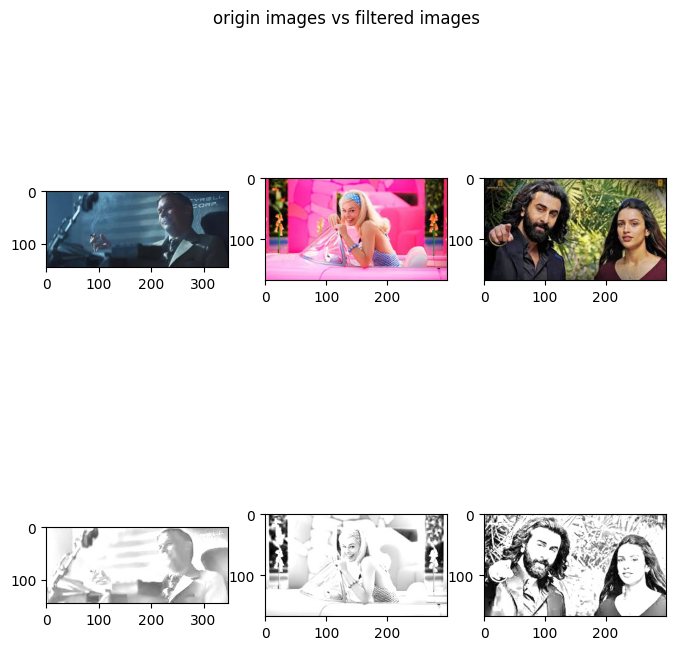

In [38]:
new_images = os.listdir(new_path)
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize=(8, 8))

for i in range(3):
    img = cv2.imread(os.path.join("./google_images/origin", origin_images[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = cv2.imread(os.path.join(new_path, new_images[i]))
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    axis[0][i].imshow(img)
    axis[1][i].imshow(img2)

plt.suptitle("origin images vs filtered images")
plt.show()

### 이미지에 대한 스크립트 작성
image에 대한 스크립트와 함께 차후 csv파일로 구성하기 위해서 dict형태로 데이터를 생성한다

단, low resolution 혹은 스크립트의 내용을 적기 난해한 이미지의 경우 제외한다.

In [64]:
index = []
for i in os.listdir(new_path):
    num = int(i[i.find('_')+1:i.rfind(".")])
    index.append(num)

In [67]:
a = sorted(index)
cols = []
for i in a:
    cols.append(f"scene_{i}.jpeg")

In [69]:
cols[:63]

['scene_2.jpeg',
 'scene_3.jpeg',
 'scene_4.jpeg',
 'scene_5.jpeg',
 'scene_7.jpeg',
 'scene_8.jpeg',
 'scene_10.jpeg',
 'scene_11.jpeg',
 'scene_12.jpeg',
 'scene_13.jpeg',
 'scene_14.jpeg',
 'scene_15.jpeg',
 'scene_16.jpeg',
 'scene_18.jpeg',
 'scene_19.jpeg',
 'scene_20.jpeg',
 'scene_21.jpeg',
 'scene_22.jpeg',
 'scene_23.jpeg',
 'scene_24.jpeg',
 'scene_25.jpeg',
 'scene_27.jpeg',
 'scene_28.jpeg',
 'scene_29.jpeg',
 'scene_30.jpeg',
 'scene_31.jpeg',
 'scene_32.jpeg',
 'scene_33.jpeg',
 'scene_35.jpeg',
 'scene_36.jpeg',
 'scene_37.jpeg',
 'scene_38.jpeg',
 'scene_39.jpeg',
 'scene_41.jpeg',
 'scene_45.jpeg',
 'scene_46.jpeg',
 'scene_47.jpeg',
 'scene_48.jpeg',
 'scene_49.jpeg',
 'scene_56.jpeg',
 'scene_58.jpeg',
 'scene_59.jpeg',
 'scene_65.jpeg',
 'scene_71.jpeg',
 'scene_73.jpeg',
 'scene_77.jpeg',
 'scene_79.jpeg',
 'scene_81.jpeg',
 'scene_83.jpeg',
 'scene_85.jpeg',
 'scene_91.jpeg',
 'scene_93.jpeg',
 'scene_99.jpeg',
 'scene_113.jpeg',
 'scene_115.jpeg',
 'scene_121.jp

In [70]:
data = {
    "file_name" : cols[:63],
    "text" : [
        'A man walking grimly among those fleeing.',
        'Father and mother lying on a mat and enjoying the sunshine',
        'A man and a woman are looking at each other. The man is laughing and the woman has a cold look.',
        'Hero carrying an injured man on his back. Frowning his face.',
        'It is raining on a wide plain. The man and woman standing on it are kissing each other.',
        'Two men and a woman are sitting in a row in the car. A man covers his ears and opens his mouth, making an expression that he can\'t hear anything.',
        'A woman is smiling happily with her travel package.',
        'A man is telling a young boy to bring his stuff.',
        'A man with blood on his face stands in the rain.',
        'Two men and a woman are sitting on the bed. They are smiling happily as if they haven\'t been able to talk about it.',
        'Two men are on the red carpet. The two men are dancing hard, as if congratulating someone.',
        'A green furry monster is telling the little queen something.',
        'A boy is getting rained on in a raincoat. The child is looking at the drain with a worried look on his face.',
        'A man is sitting in the car. He is deep in thought, leaning his head against the window as if he has decided something.',
        'I can see a car flying in the sky. It seems to be flying quite high, and the clouds are floating on the side of the car.',
        'A man and a old lady are sitting on a bench, distanced from each other. The man in the suit is sitting with a box on his lap. The old lady is wiping her tears with a handkerchief.',
        'A man and a woman are kissing each other while holding each other.',
        'Two girls are standing in the hallway wearing dresses.',
        'A woman is sitting on the sofa staring at someone.',
        'A man and a woman are sitting on a window frame looking at each other fondly.',
        'A man and a woman are holding each other in a white suit and white wedding dress. The woman\'s face is full of smiles.',
        'A man is lying in bed with his upper body half up. Staring at someone.',
        'A woman wearing sunglasses is eating bread on the street.',
        'A man and a woman are going somewhere in a car. The woman is driving, and she is singing happily.',
        'A man and a woman are exchanging opinions with each other in front of the door of their house. The man seems to be clenched his fist, as if something is frustrating.',
        'A man is standing with his palm facing forward. All the bullets stop in front of his palm in the use of superhuman strength.',
        'Three men are standing on the roof of a building. Two men are looking at the sky, and the other is staring straight ahead.',
        'Many people are gathered in one place. The woman is holding the gun to her head with an expressionless face as if she has decided something, and the man sitting in front of her tries to stop her.',
        'There is a man and a woman lying on a mat in the grass. The woman is pointing her finger at the sky as if something in the sky is strange.',
        'A man and a woman are in the woods. The woman is teaching the man how to shoot a bow.',
        'A man is standing in front of a lake. He is standing with open arms, as if he had won something free.',
        'The couple is sitting on the sofa reading a book. Even though they are reading their own books, they are holding each other\'s hands affectionately.',
        'A couple is watching a movie with popcorn at a movie theater. They are covering their eyes with their hands to see if they are watching a horror genre movie.',
        'Two men are reflected on the screen. A man is lying on the floor, and a man is staring straight ahead with feathers attached to his head.',
        'A couple is dancing together in the moonlight.',
        'A man and a woman are going somewhere by boat. Both are watching the scenery.',
        'A man is sending an "OK" sign with a gun in his hand.',
        'A couple is standing in the water facing each other\'s foreheads.',
        'Many people are dancing. The right hand is placed on the head, and the left hand is straight forward.',
        'A man is stopped in front of the house on a black horse.',
        'The clown is staring straight ahead with a red balloon in his hand.',
        'A man is sitting on the floor holding on to the legs of a woman who is standing up.',
        'A man smashes the door and tucks his head through the gap to look around.',
        'A grandfather is falling from the sky holding a string. The string is connected to a grandson, a dog, and a house.',
        'A man and a woman are seen on the screen. The man is hugging the woman from behind.',
        'A woman is sitting in bed spending time with her pet.',
        'There are many people in the movie theater. The man and the woman are smiling at each other.',
        'A band is performing. The guitarist is wearing a red guitar and singing hard.',
        'A man stands in front of a mirror, his topless, pointing a gun at somewhere.',
        'A woman is staring somewhere with a sad look on her face. On the contrary, the man behind him is smiling happily while looking straight ahead.',
        'Three people are sitting on a bridge. Two men are staring down, and a woman is staring straight ahead.',
        'A man and a woman are walking down an alleyway at night. The lights are on both sides of the alleyway.',
        'A pilot is holding a drug in his hand. I can see a flying person over the window.',
        'A man is walking toward the front with a gun in his hand.',
        'A man wearing sunglasses and earphones is getting up in the car and pouting his mouth.',
        'A woman in a dress is sitting on the lap of a man in a suit. They are smiling at each other, looking happy.',
        'A woman and a man are running forward, leaving behind an exploding bomb.',
        'A man is sitting with a saw in his hand. He seems to be thinking about something.',
        'A couple is lying together on a slightly cracked ice sheet.',
        'A man drifting on a deserted island is starting a fire. He is very happy, as if he hasn\'t been able to start a fire for a long time.',
        'A ghost with a bizarre face can be seen behind a woman with a scary expression.',
        'A man and a woman are staring at each other scarily as if they\'re about to fight.',
        'Three men are sitting on the sofa. One is holding a beer in his hand, and the other two are focusing somewhere.',
    ]
}

print(len(data["text"]))

63


데이터 프레임으로 구성한다.

In [72]:
import pandas as pd

df = pd.DataFrame(data)
df

,file_name,text
0,scene_2.jpeg,A man walking grimly among those fleeing.
1,scene_3.jpeg,Father and mother lying on a mat and enjoying ...
2,scene_4.jpeg,A man and a woman are looking at each other. T...
3,scene_5.jpeg,Hero carrying an injured man on his back. Frow...
4,scene_7.jpeg,It is raining on a wide plain. The man and wom...
...,...,...
58,scene_149.jpeg,A couple is lying together on a slightly crack...
59,scene_155.jpeg,A man drifting on a deserted island is startin...
60,scene_161.jpeg,A ghost with a bizarre face can be seen behind...
61,scene_165.jpeg,A man and a woman are staring at each other sc...


In [75]:
df.to_csv("./google_images/applied/metadata.csv", sep=",", encoding="utf8", index=False)

### Set Dataset
huggingface의 모델로 훈련할 수 있는 형태로 데이터셋을 구축해보자.

In [10]:
from huggingface_hub import notebook_login

notebook_login()

In [13]:
from datasets import load_dataset

dataset = load_dataset("imagefolder" ,data_dir=r'diffusers/examples/text_to_image/google_images/applied/storyboard', split='train')
dataset.push_to_hub("HeonWoo22/my_dataset")  # 내 저장소에 데이터셋 올리기

Resolving data files:   0%|          | 0/64 [00:00<?, ?it/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/63 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

HfHubHTTPError: 403 Client Error: Forbidden for url: https://huggingface.co/api/datasets/HeonWoo22/my_dataset/preupload/main (Request ID: Root=1-66179923-512ba15874ae131f4f840212;08aed4e4-a778-4164-b16f-b30a1851bff9)

Forbidden: you must use a write token to upload to a repository.

### Training Script
훈련시키는 스크립트를 구성해보자. 그 전에, 훈련 스크립트를 좀 더 빠르고 원활하게 만들어주는 accelerate부터 설정한다.

### Accelerate
사실 가장 핵심이 되는 기능으로는 TPU, 혹은 다중 GPU설정으로 보이는데 두 환경 모두 해당되지 않기에, 단일 GPU설정법만 정리한다.

```
which compute environment are you running? - 1
This machine
Which type of machine are you using? - 2
No distributed training
Do you want to run your training on CPU only (even if a GPU / Apple Silicon / Ascend NPU device is available)? [yes/NO]:NO - 3
Do you wish to optimize your script with torch dynamo?[yes/NO]:NO - 4
Do you want to use DeepSpeed? [yes/NO]: NO - 5
What GPU(s) (by id) should be used for training on this machine as a comma-seperated list? [all]:0 - 6
```
1. 어떤 환경에서 실행하는지를 묻는다. AWS혹은 local 중 2지선다의 형태인데 AWS환경이 아니기에 `This machine` 선택
2. TPU, 멀티 CPU, 멀티 GPU, 분할 없음 정도로 나오는데 그 어느 곳에도 해당되지 않기에 `No distrivuted training` 선택
3. GPU가 있어도 CPU에서만 돌리겠냐는 선택지. cuda 설정이 되어 있기에 `NO`입력
4. `torch dynamo`를 이용해서 스크립트를 최적화 하겠냐는 선택지. 사용해본적도 없고 괜한 충돌을 일으킬 바엔.. 이라는 생각으로 `NO`선택
5. `Deep Speed`를 사용하겠냐는 선택지. 분산 학습을 위한 라이브러리이기에 `NO`입력
6. 콤마로 구분된 GPU들 중 몇 번을 사용하겠냐는 선택지. GPU는 하나밖에 없기에 `0`입력

### Script
```
$env:MODEL_NAME="runwayml/stable-diffusion-v1-5"

accelerate launch train_text_to_image.py --pretrained_model_name_or_path=$env:MODEL_NAME --dataset_name='google_images/applied/storyboard' --resolution=256 --center_crop --random_flip --train_batch_size=1 --gradient_accumulation_steps=4 --gradient_checkpointing --max_train_steps=1000 --learning_rate=1e-05 --max_grad_norm=1 --lr_scheduler="constant" --lr_warmup_steps=0 --output_dir="./second_training" --mixed_precision="fp16"
```

- `$env:MODEL_NAME` : Linux의 export명령어와 동일한 역할을 하며, powershell 환경에 MODEL_NAME이란 변수 이름을 추가하는 정도로 생각하면 좋겠다.
- `--resolution` : input image의 resolution을 의미한다. 512로 설정했기에 512, 512의 이미지로 들어간다.
- `--random_flip` : 이미지를 random하게 horizontal flip한다.
- `--center_crop` : 입력된 이미지를 해상도를 기준으로 중앙을 잘라낼지에 대한 여부. 설정하지 않으면 이미지가 무작위로 잘린다.
- `--max_train_steps` : epochs와 동일

### 더 복잡한 모델(Stable DiffusionXL)

```
$env:MODEL_NAME="stabilityai/stable-diffusion-xl-base-1.0"
$env:VAE_NAME="madebyollin/sdxl-vae-fp16-fix"
$env:DATASET_NAME="google_images/applied/storyboard"

accelerate launch train_text_to_image_sdxl.py --pretrained_model_name_or_path=$env:MODEL_NAME --pretrained_vae_model_name_or_path=$env:VAE_NAME --dataset_name=$env:DATASET_NAME --resolution=256 --center_crop --random_flip --proportion_empty_prompts=0.2 --train_batch_size=1 --gradient_accumulation_steps=1 --gradient_checkpointing --max_train_steps=10 --learning_rate=1e-06 --lr_scheduler="constant" --lr_warmup_steps=0 --mixed_precision="no" --output_dir="/xdls_training" 
```

어떤 방법을 써도 Cuda OOM 문제를 회피할 수 없다.. 덜 복잡한 모델로 훈련한다

### Inference
훈련시킨 text-to-image 모델을 사용해보자.

In [1]:
from diffusers import StableDiffusionPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained(r"C:\Users\admin\.jupyter\TTI\diffusers\examples\text_to_image\first_training", torch_dtype=torch.float16, use_safetensors=True).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

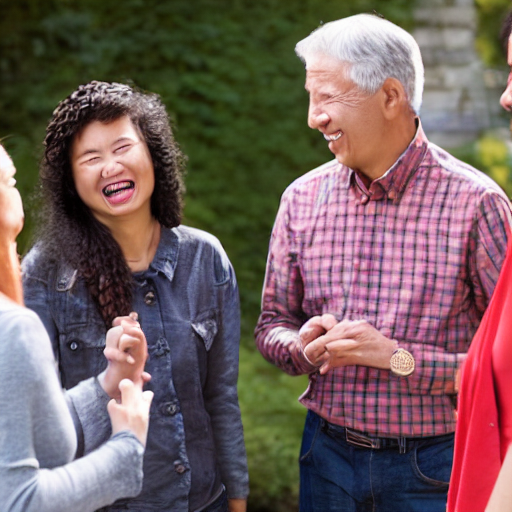

In [8]:
image = pipeline(prompt="Three figures are visible. Two women are laughing while talking to someone, and a man stands expressionless.").images[0]
# image.save("yoda-pokemon.png")
image